# Differentiation and interpolation

1. The second order finite difference formula is 

$$f''(x)= \frac{f(x-h)-2f(x)+f(x+h)}{h^2}+O(h^2)$$

>- Use it to calculate the second dervative of $e^{-x^2}$ at $x=0$ and $x=1$ using different values of $h$ given by $np.logspace(0,-6,7)$. Plot the error as a function of $h$ (look for the .axis('equal') option). 

>- Find the finite forward and backward second derivative differences formula (I know you can find it online, but it would be a  good exercise if you try to calculate it yourself) and repeat the previous exercise.

>- Calculate the error, the order of convergence (at least be able to tell if it is linear or higher) and explain the results.

2. Effect of the errors in the function values when calculating the derivative.

>- Code a function that admits a vector that represents the positions in the x axis, and the values of a function at those points as arguments, and returns the approximate values of the derivative at those points using forward finite differences.

>- Test it with x = np.linspace(0, 2*np.pi, 100, endpoint=True) and $y=sin(x)$. Compare the result with $cos(x)$.

>- Modify the values of $y$ adding to it an array of random numbers of the same size (you may use np.random.normal).

>- Now use that modified $y$ to approximate the derivative. What happens?

>- Experiment using other finite difference formulas and different separations between nodes.


# Solution 

## Exercise 1 

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dev2(f, x, h) -> float:
    return ( f(x-h) -2*f(x) + f(x+h) )/ h**2

def dev2_forward(f, x, h) -> float:
    return ( f(x) -2*f(x+h) + f(x+2*h) )/ h**2

def dev2_backward(f, x, h) -> float:
    return ( f(x-2*h) -2*f(x-h) + f(x) )/ h**2


def error(f_dev2, approx_dev2, f, x, h):
    return abs( f_dev2(x) - approx_dev2(f, x, h) )

Ans: -1.2642411176571153,   Error: 0.7357588823428847 
Ans: -1.9900332501663782,   Error: 0.00996674983362178 
Ans: -1.9999000033343872,   Error: 9.99966656127782e-05 
Ans: -1.999999000079633,   Error: 9.99920366950846e-07 
Ans: -1.999999987845058,   Error: 1.21549419418443e-08 
Ans: -2.0000001654807416,   Error: 1.6548074155409154e-07 
Ans: -2.0000667788622195,   Error: 6.677886221950757e-05 
Ans: 0.2825567565458495,   Error: 0.45320212579703517 
Ans: 0.7296463309943767,   Error: 0.006112551348507966 
Ans: 0.7356975709832403,   Error: 6.131135964437817e-05 
Ans: 0.7357582693101605,   Error: 6.130327241393729e-07 
Ans: 0.7357588760470435,   Error: 6.295841181724882e-09 
Ans: 0.7357581210953866,   Error: 7.612474980378536e-07 
Ans: 0.7358003095703225,   Error: 4.142722743782912e-05 




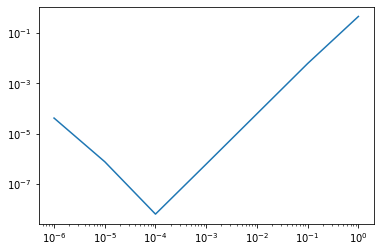

Ans: 0.2825567565458495,   Error: 2.2825567565458496 
Ans: -1.9310228346013032,   Error: 0.0689771653986968 
Ans: -1.9993001033224989,   Error: 0.0006998966775011439 
Ans: -1.9999929999903188,   Error: 7.000009681235042e-06 
Ans: -1.9999999323339068,   Error: 6.766609317310213e-08 
Ans: -2.0000001654807416,   Error: 1.6548074155409154e-07 
Ans: -2.0000667788622195,   Error: 6.677886221950757e-05 
Ans: 0.33137157319806065,   Error: 0.404387309144824 
Ans: 0.8412640993789465,   Error: 0.10550521703606186 
Ans: 0.7500456609255135,   Error: 0.014286778582628834 
Ans: 0.7372261087712495,   Error: 0.0014672264283648317 
Ans: 0.7359059917000366,   Error: 0.00014710935715189777 
Ans: 0.7357753295522683,   Error: 1.6447209383652073e-05 
Ans: 0.7357447984190912,   Error: 1.408392379342871e-05 




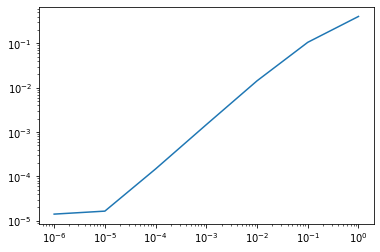

Ans: 0.28255675654584955,   Error: 2.2825567565458496 
Ans: -1.9310228346013143,   Error: 0.0689771653986857 
Ans: -1.9993001033213886,   Error: 0.000699896678611367 
Ans: -1.999993000101341,   Error: 6.9998986589325796e-06 
Ans: -1.999999943436137,   Error: 5.656386292685056e-08 
Ans: -2.0000001654807416,   Error: 1.6548074155409154e-07 
Ans: -2.000177801164682,   Error: 0.00017780116468202323 
Ans: -1.2642411176571153,   Error: 2.0 
Ans: 0.5455732768608667,   Error: 0.19018560548201802 
Ans: 0.72061383496691,   Error: 0.015145047375974663 
Ans: 0.734283071901487,   Error: 0.0014758104413976625 
Ans: 0.7356116937806689,   Error: 0.00014718856221573873 
Ans: 0.7357447984190911,   Error: 1.4083923793539732e-05 
Ans: 0.73568928726786,   Error: 6.959507502468654e-05 




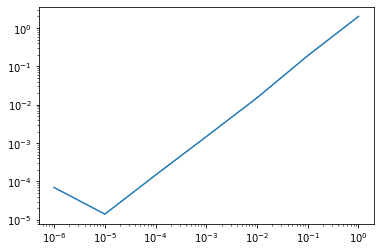

In [3]:
def f(x):
    return np.e**(- x**2)

def f_dev2(x):
    return (-2 + 4*x**2)*f(x)


h = np.logspace(0,-6,7)

for method in (dev2, dev2_forward, dev2_backward):

    for x in (0,1): 
        [print(f'Ans: {method(f, x, h_i)},   Error: {error(f_dev2, method, f, x, h_i)} ') for h_i in h]

    print('\n')

    plt.plot(h, error(f_dev2, method, f, 1, h))
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

### Part 2 